In [526]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [527]:
from tkinter import *

In [528]:
from PIL import Image,ImageTk

In [529]:
from tkinter import messagebox

In [530]:
l1=['itching','skin_rash','nodal_skin_eruptions','continuous_sneezing','shivering','chills','joint_pain',
    'stomach_pain','acidity','ulcers_on_tongue','muscle_wasting','vomiting','burning_micturition','spotting_ urination','fatigue',
    'weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness','lethargy','patches_in_throat',
    'irregular_sugar_level','cough','high_fever','sunken_eyes','breathlessness','sweating','dehydration','indigestion',
    'headache','yellowish_skin','dark_urine','nausea','loss_of_appetite','pain_behind_the_eyes','back_pain','constipation',
    'abdominal_pain','diarrhoea','mild_fever','yellow_urine','yellowing_of_eyes','acute_liver_failure','fluid_overload',
    'swelling_of_stomach','swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
    'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs','fast_heart_rate',
    'pain_during_bowel_movements','pain_in_anal_region','bloody_stool','irritation_in_anus','neck_pain','dizziness','cramps',
    'bruising','obesity','swollen_legs','swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
    'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips','slurred_speech','knee_pain','hip_joint_pain',
    'muscle_weakness','stiff_neck','swelling_joints','movement_stiffness','spinning_movements','loss_of_balance','unsteadiness','weakness_of_one_body_side',
    'loss_of_smell','bladder_discomfort','foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
    'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain','abnormal_menstruation','dischromic _patches',
    'watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances',
    'receiving_blood_transfusion','receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen','history_of_alcohol_consumption',
    'fluid_overload','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
    'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose','yellow_crust_ooze']


OPTIONS=sorted(l1)

In [531]:
print(len(l1))

132


In [532]:
disease=['Covid-19','Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction',
    'Peptic ulcer diseae','AIDS','Diabetes','Gastroenteritis','Bronchial Asthma','Hypertension',
    ' Migraine','Cervical spondylosis',
    'Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue','Typhoid','hepatitis A',
    'Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E','Alcoholic hepatitis','Tuberculosis',
    'Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
    'Heartattack','Varicoseveins','Hypothyroidism','Hyperthyroidism','Hypoglycemia','Osteoarthristis',
    'Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne','Urinary tract infection','Psoriasis',
    'Impetigo']

In [533]:
l2=[]
for i in range(0,len(l1)):
    l2.append(0)

In [534]:
df=pd.read_csv("training.csv")

In [535]:
df.replace({'prognosis':{'Covid-19':0,'Fungal infection':1,'Allergy':2,'GERD':3,'Chronic cholestasis':4,'Drug Reaction':5,
        'Peptic ulcer diseae':6,'AIDS':7,'Diabetes ':8,'Gastroenteritis':9,'Bronchial Asthma':10,'Hypertension ':11,
    'Migraine':12,'Cervical spondylosis':13,
    'Paralysis (brain hemorrhage)':14,'Jaundice':15,'Malaria':16,'Chicken pox':17,'Dengue':18,'Typhoid':19,'hepatitis A':20,
    'Hepatitis B':21,'Hepatitis C':22,'Hepatitis D':23,'Hepatitis E':24,'Alcoholic hepatitis':25,'Tuberculosis':26,
    'Common Cold':27,'Pneumonia':28,'Dimorphic hemmorhoids(piles)':29,'Heart attack':30,'Varicose veins':31,'Hypothyroidism':32,
    'Hyperthyroidism':33,'Hypoglycemia':34,'Osteoarthristis':35,'Arthritis':36,
    '(vertigo) Paroymsal  Positional Vertigo':37,'Acne':38,'Urinary tract infection':39,'Psoriasis':40,
    'Impetigo':41}},inplace=True)


In [536]:
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [537]:
def plotScatterMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna('columns')
    df1 = df1[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [538]:
'''plotPerColumnDistribution(df, 10, 5)
plotScatterMatrix(df, 20, 10)'''

'plotPerColumnDistribution(df, 10, 5)\nplotScatterMatrix(df, 20, 10)'

In [539]:
X= df[l1]
y = df[["prognosis"]]
np.ravel(y)
print(X)
print(y)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           0          0                     0                    0   
1           0          0                     0                    0   
2           0          0                     0                    0   
3           0          0                     0                    0   
4           0          0                     0                    0   
5           1          1                     1                    0   
6           0          1                     1                    0   
7           1          0                     1                    0   
8           1          1                     0                    0   
9           1          1                     1                    0   
10          0          1                     1                    0   
11          1          0                     1                    0   
12          1          1                     0                    0   
13    

[4925 rows x 132 columns]
      prognosis
0             0
1             0
2             0
3             0
4             0
5             1
6             1
7             1
8             1
9             1
10            1
11            1
12            1
13            1
14            1
15            2
16            2
17            2
18            2
19            2
20            2
21            2
22            2
23            2
24            2
25            3
26            3
27            3
28            3
29            3
...         ...
4895         12
4896         13
4897         14
4898         15
4899         16
4900         17
4901         18
4902         19
4903         20
4904         21
4905         22
4906         23
4907         24
4908         25
4909         26
4910         27
4911         28
4912         29
4913         30
4914         31
4915         32
4916         33
4917         34
4918         35
4919         36
4920         37
4921         38
4922         39
4923         4

In [540]:
tr=pd.read_csv("testing.csv")

In [541]:
tr.replace({'prognosis':{'Covid-19':0,'Fungal infection':1,'Allergy':2,'GERD':3,'Chronic cholestasis':4,'Drug Reaction':5,
        'Peptic ulcer diseae':6,'AIDS':7,'Diabetes ':8,'Gastroenteritis':9,'Bronchial Asthma':10,'Hypertension ':11,
    'Migraine':12,'Cervical spondylosis':13,
    'Paralysis (brain hemorrhage)':14,'Jaundice':15,'Malaria':16,'Chicken pox':17,'Dengue':18,'Typhoid':19,'hepatitis A':20,
    'Hepatitis B':21,'Hepatitis C':22,'Hepatitis D':23,'Hepatitis E':24,'Alcoholic hepatitis':25,'Tuberculosis':26,
    'Common Cold':27,'Pneumonia':28,'Dimorphic hemmorhoids(piles)':29,'Heart attack':30,'Varicose veins':31,'Hypothyroidism':32,
    'Hyperthyroidism':33,'Hypoglycemia':34,'Osteoarthristis':35,'Arthritis':36,
    '(vertigo) Paroymsal  Positional Vertigo':37,'Acne':38,'Urinary tract infection':39,'Psoriasis':40,
    'Impetigo':41}},inplace=True)


In [542]:
'''plotPerColumnDistribution(tr, 10, 5)
plotScatterMatrix(tr, 20, 10)'''

'plotPerColumnDistribution(tr, 10, 5)\nplotScatterMatrix(tr, 20, 10)'

In [543]:
X_test= tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)
print(X_test)
print(y_test)

    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         0          0                     0                    0          1   
1         1          1                     1                    0          0   
2         0          0                     0                    1          1   
3         0          0                     0                    0          0   
4         1          0                     0                    0          0   
5         1          1                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11        0          0                  

In [544]:
def scatterplt(disea):
    x = ((df.loc[disea]).sum())#total sum of symptom reported for given disease
    x.drop(x[x==0].index,inplace=True)#droping symptoms with values 0
    print(x.values)
    y = x.keys()#storing nameof symptoms in y
    print(len(x))
    print(len(y))
    plt.title(disea)
    plt.scatter(y,x.values)
    plt.show()

In [545]:
def scatterinp(sym1,sym2,sym3,sym4,sym5):
    x = [sym1,sym2,sym3,sym4,sym5]#storing input symptoms in y
    y = [0,0,0,0,0]#creating and giving values to the input symptoms
    if(sym1!='Select Here'):
        y[0]=1
    if(sym2!='Select Here'):
        y[1]=1
    if(sym3!='Select Here'):
        y[2]=1
    if(sym4!='Select Here'):
        y[3]=1
    if(sym5!='Select Here'):
        y[4]=1
    print(x)
    print(y)
    plt.scatter(x,y)
    plt.show()

In [546]:
frame1=Tk()

In [547]:
pred1=StringVar()

In [548]:
    Symptom1 = StringVar()
    Symptom1.set("Select Here")        
    Symptom2 = StringVar()
    Symptom2.set("Select Here")
    Symptom3 = StringVar()
    Symptom3.set("Select Here")
    Symptom4 = StringVar()
    Symptom4.set("Select Here")
    Symptom5 = StringVar()
    Symptom5.set("Select Here")

In [549]:
def bysymptoms():
    frame2=Toplevel(frame1)
    frame2.geometry("600x600")
    frame2.title('Enter Symptoms')

    label1=Label(frame2,text="Please Enter Your Symptoms To Diagnose Yourself", bg="silver",relief="solid",font=("arial",16,"bold")).pack(fill=BOTH, pady=20,padx=20)

   
   
    S1Lb = Label(frame2, text="Please select Symptom 1", fg="Black", bg="silver",relief="solid",font=("Times",13,"bold")).place(relx=0.10,rely=0.16)
    S2Lb = Label(frame2, text="Please select Symptom 2", fg="Black", bg="silver",relief="solid",font=("Times",13,"bold")).place(relx=0.10,rely=0.22)
    S3Lb = Label(frame2, text="Please select Symptom 3", fg="Black", bg="silver",relief="solid",font=("Times",13,"bold")).place(relx=0.10,rely=0.28)
    S4Lb = Label(frame2, text="Please select Symptom 4", fg="Black", bg="silver",relief="solid",font=("Times",13,"bold")).place(relx=0.10,rely=0.34)
    S5Lb = Label(frame2, text="Please select Symptom 5", fg="Black", bg="silver",relief="solid",font=("Times",13,"bold")).place(relx=0.10,rely=0.40)

 


    S1 = OptionMenu(frame2,Symptom1,*OPTIONS).place(relx=0.70,rely=0.16)
    S2 = OptionMenu(frame2,Symptom2,*OPTIONS).place(relx=0.70,rely=0.22)
    S3 = OptionMenu(frame2,Symptom3,*OPTIONS).place(relx=0.70,rely=0.28)
    S4 = OptionMenu(frame2,Symptom4,*OPTIONS).place(relx=0.70,rely=0.34)
    S5 = OptionMenu(frame2,Symptom5,*OPTIONS).place(relx=0.70,rely=0.40)

    lbl=Label(frame2, text="You Might Have the Following Disease(s):- ",relief="solid",bg="silver",font=("Times",19,"bold italic")).place(relx=0.10,rely=0.50)

    dst = Button(frame2, text=" By  Decision tree  ", fg="Black", bg="silver",relief=RAISED,font=("Times",13,"bold"),command=DecisionTree).place(relx=0.10,rely=0.63)
    rnf = Button(frame2, text="By Random Forest", fg="Black", bg="silver",relief=RAISED,font=("Times",13,"bold"),command=randomforest).place(relx=0.10,rely=0.69)
    lr = Button(frame2,  text="   By  Naive  Bayes ", fg="Black", bg="silver",relief=RAISED,font=("Times",13,"bold"),command=NaiveBayes).place(relx=0.10,rely=0.75)
    #kn = Button(frame2,  text="        By  K N N        ", fg="Black", bg="silver",relief=RAISED,font=("Times",13,"bold"),command=NaiveBayes).place(relx=0.10,rely=0.81)
    rs = Button(frame2,text="Reset Inputs", bg="silver",relief=RAISED,font=("Times",13,"bold"),command=Reset).place(relx=0.10,rely=0.81)

    t1=Label(frame2,font=("Times",10,"bold italic"),width=15,textvariable=pred1,relief="sunken").place(relx=0.70,rely=0.63)
    t2=Label(frame2,font=("Times",10,"bold italic"),width=15,textvariable=pred2,relief="sunken").place(relx=0.70,rely=0.69)
    t3=Label(frame2,font=("Times",10,"bold italic"),width=15,textvariable=pred3,relief="sunken").place(relx=0.70,rely=0.75)

    frame2.mainloop()


In [550]:
pred2=StringVar()
def randomforest():
    if((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            frame1.mainloop()
    else:
        from sklearn.ensemble import RandomForestClassifier
        clf4 = RandomForestClassifier(n_estimators=100)
        clf4 = clf4.fit(X,np.ravel(y))

        # calculating accuracy 
        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf4.predict(X_test)
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)
    
        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = clf4.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred2.set(" ")
            pred2.set(disease[a])
        else:
            pred2.set(" ")
            pred2.set("Not Found")
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS RandomForest(Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO RandomForest(Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?)",(Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred2.get()))
        conn.commit()  
        c.close() 
        conn.close()
        #printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred2.get())

In [551]:
pred3=StringVar()
def NaiveBayes():
    if((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            frame2.mainloop()
    else:
        from sklearn.naive_bayes import GaussianNB
        gnb = GaussianNB()
        gnb=gnb.fit(X,np.ravel(y))

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=gnb.predict(X_test)
        print("Naive Bayes")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = gnb.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred3.set(" ")
            pred3.set(disease[a])
        else:
            pred3.set(" ")
            pred3.set("Not Found")
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS NaiveBayes(Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO NaiveBayes(Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?)",(Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred3.get()))
        conn.commit()  
        c.close() 
        conn.close()
         #printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred3.get())

In [552]:
pred1=StringVar()
def DecisionTree():
    if((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            frame1.mainloop()
    else:
        from sklearn import tree

        clf3 = tree.DecisionTreeClassifier() 
        clf3 = clf3.fit(X,y)

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf3.predict(X_test)
        print("Decision Tree")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = clf3.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break

    
        if (h=='yes'):
            pred1.set(" ")
            pred1.set(disease[a])
        else:
            pred1.set(" ")
            pred1.set("Not Found")
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS DecisionTree(Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO DecisionTree(Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?)",(Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred1.get()))
        conn.commit()  
        c.close() 
        conn.close()
        #printing scatter plot of input symptoms
        #printing scatter plot of disease predicted vs its symptoms
        scatterinp(Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get())
        scatterplt(pred1.get())

In [553]:
prev_win=None
def Reset():
    global prev_win

    Symptom1.set("Select Here")
    Symptom2.set("Select Here")
    Symptom3.set("Select Here")
    Symptom4.set("Select Here")
    Symptom5.set("Select Here")

    
    pred1.set(" ")
    pred2.set(" ")
    pred3.set(" ")
    try:
        prev_win.destroy()
        prev_win=None
    except AttributeError:
        pass

In [554]:
def chkcvd():
    frame3=Toplevel(frame1)
    frame3.geometry("600x600")
    frame3.title("Covid-19 Insights")

    import tkinter
    from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

    # seaborn example
    
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    df = pd.read_csv('covid_19_india.csv')
    



    
    def create_plot():
        sns.set(style="white")

        
        f, ax = plt.subplots(figsize=(10, 9))
        #df = pd.read_csv('covid_19_india.csv')
        #sns.lineplot(x = "Date", y = "Confirmed", data = df)
        sns.lineplot(x = "Date", y = "Confirmed", data = df)
        sns.lineplot(x = "Date", y = "Cured", data = df)
        plt.ylabel("Confirmed and Cured")

       
        return f

    # --- main ---
    fig = create_plot()

    canvas = FigureCanvasTkAgg(fig, master=frame3)  # A tk.DrawingArea.
    canvas.draw()
    canvas.get_tk_widget().pack()
    def create_plot():
        sns.set(style="white")

        
        f, ax = plt.subplots(figsize=(10, 9))
        #df = pd.read_csv('covid_19_india.csv')
        sns.lineplot(x = "Date", y = "Confirmed", data = df)
        #sns.lineplot(x = "Date", y = "Confirmed", data = df)
        #sns.lineplot(x = "Date", y = "Cured", data = df)
        #plt.ylabel("Confirmed and Cured")

       
        return f

    # --- main ---
    fig = create_plot()

    canvas = FigureCanvasTkAgg(fig, master=frame3)  # A tk.DrawingArea.
    canvas.draw()
    canvas.get_tk_widget().pack()
    

    

    frame3.mainloop()


    

In [555]:

frame1.title("DR.Healthy")
frame1.geometry("600x600")

label1=Label(frame1, text="Welcome to DR.Health - Your personal physician", bg="silver",relief="solid",font=("arial",16,"bold"))
label1.pack(fill=BOTH,padx=20,pady=20,)

img=Image.open("pic.png")
img=ImageTk.PhotoImage(img)

logo=Label(image=img).pack()

label2=Label(frame1, text="Consult your personal doctor about the symptoms that you are having",font=("arial",10,"italic")).pack()
label3=Label(frame1, text="OR",font=("arial",10,"italic")).pack()
label4=Label(frame1, text="Check the symptoms for diseases that you feel you might have",font=("arial",10,"italic")).pack()

button1=Button(frame1,text="Enter Symptoms",bg="grey",relief=RAISED,font=("arial",12,"bold"),command=bysymptoms).pack(fill=BOTH, padx=2,pady=10)

button2=Button(frame1,text="Check symptoms",bg="grey",relief=RAISED,font=("arial",12,"bold")).pack(fill=BOTH, padx=2,pady=10)
button3=Button(frame1,text="Check Covid-19 Insights",bg="red",fg="yellow",relief=RAISED,font=("arial",12,"bold"),command=chkcvd).pack(fill=BOTH, padx=2,pady=10)
label5=Label(frame1, text="About us :- This a college level project determined to provide OPD services through various machine learning algorithms.",font=("arial",8,"italic")).pack()


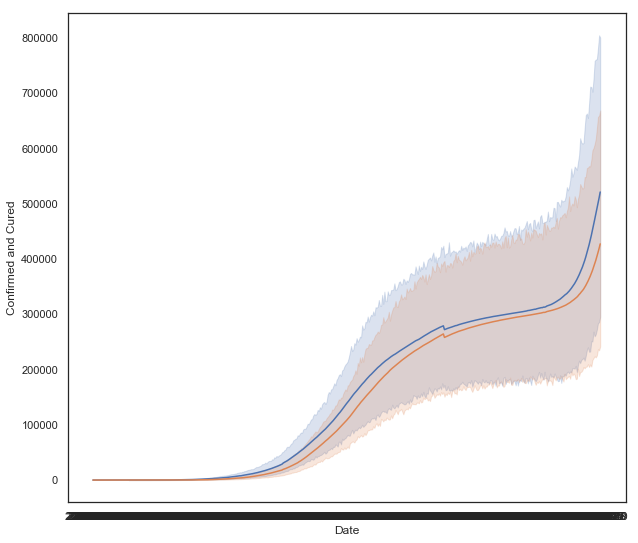

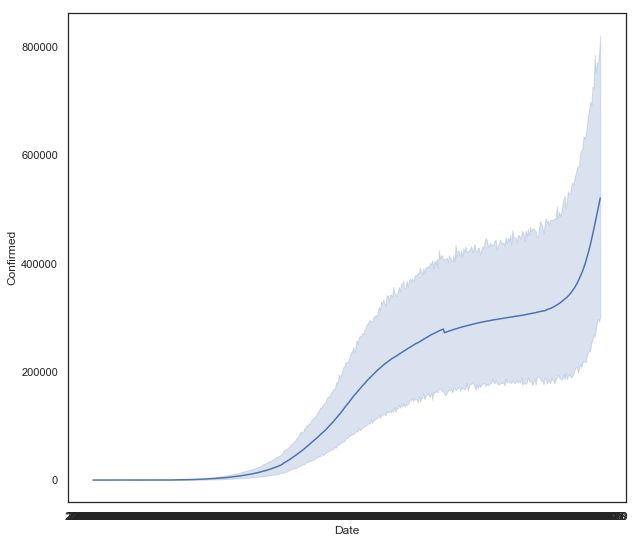

In [556]:
frame1.mainloop()